In [51]:
import numpy as np
import pandas as pd 

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [53]:
from modules import TrainData, one_hot ,position_transform, wakati, meishi,FastText_Vectrizer,rename_section,exam_preprosses,to_vec

In [54]:
# データの修正

In [95]:
df = pd.read_csv('DATA20200401_20220331(修正後).csv', encoding='cp932', header=None)

In [96]:
# ラベルの間違い修正
df[3].unique()

array(['A1', 'A2', 'AB1', 'AB3', 'AB4', 'AB5', 'AB6', 'B1', 'B2', 'BL1',
       'C1', 'C2', 'C３', 'C3', 'C3.', 'DW', 'H1', 'H10', 'H12', 'H13',
       'H13 ', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H2', 'H20',
       'H3', 'H4', 'H5', 'H6', 'H6\n', 'H7', 'H７', 'H7.', 'H8', 'H８',
       'H9', 'HS', 'K1', 'K2', 'L1', 'L2', 'L3', 'L4', 'L5', 'LI1',
       'LI1\n', 'LI2', 'LI3', 'LI3\n', 'LI4', 'N1', 'P1', 'PL1', 'R1',
       'R2', 'S1', 'S1\n', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S9', 'U1',
       'U2', 'U3', 'U4', 'U5', nan], dtype=object)

In [97]:
df[3]=df[3].replace(['C３', 'C3', 'C3.'], 'C3')
df[3]=df[3].replace(['H13', 'H13 '], 'H13')
df[3]=df[3].replace(['H6', 'H6\n'], 'H6')
df[3]=df[3].replace(['H7', 'H７', 'H7.'], 'H7')
df[3]=df[3].replace(['H8', 'H８'], 'H8')
df[3]=df[3].replace(['LI3\n'], 'LI3')
df[3]=df[3].replace(['S1', 'S1\n'], 'S1')
df[3]=df[3].replace(['LI1','LI1\n'], 'LI1')

In [98]:
df[df[3]=='H14']

,0,1,2,3,4,5,6,7,8
4063,11,女,耳鼻,H14,頭部(脳),嗅球プロトコル。先天性嗅覚障害です ３Tでお願いします。,くも膜のう胞,依頼通りに嗅球プロトコル,単純


In [99]:
df[2] = df[2].replace('H1', '脳外')

In [100]:
df[3] = df[3].replace('H14', 'N1')

In [101]:
df[df.isnull().any(axis=1)]

,0,1,2,3,4,5,6,7,8
3,55,男,血内,A2,下肢血管：静脈（単純）,上記症例。 左下肢血栓症の疑い。本人の訴えは、大腿部から下腿にかけてです。 本人の強い希望に...,多発性骨髄腫,NaN,単純
128,80,女,放科,AB3,骨盤部,病診：いしやま内科整形外科よりご紹介。腹部不快感で受診。腹部エコーで卵巣腫大の疑い。精査目的。,卵巣腫瘍の疑い,NaN,単純
206,32,女,脳内,AB3,婦人科下腹部,NMDA受容体脳炎疑いで救急搬送。下腹部CTで奇形 腫の疑いあり。MRIにて精査お願いします。,卵巣奇形腫の疑い,NaN,単純
327,45,女,放科,AB3,婦人科下腹部,病診 不整出血にて受診、自然に改善したが、その際の診察エコーにて左卵巣腫瘍を疑う（卵管血腫？...,卵巣腫瘍,NaN,単純
375,52,女,母女,AB3,婦人科下腹部,急性腹症で救急受診した患者。 骨盤内に充実部分を伴う嚢胞性腫瘤および腹水あり。 精査目的です。,卵巣癌の疑い,NaN,単純＋造影Gd
...,...,...,...,...,...,...,...,...,...
18754,84,女,救急,S5,全脊椎(単純)Sagのみ,1ヶ月ほど前より背部痛あり。3/23CTで複数の圧 迫骨折指摘を指摘された。何とか歩行できて...,胸腰椎圧迫骨折,NaN,単純
18761,89,女,心外,S5,全脊椎(単純)Sagのみ,亜急性に進行する下肢運動障害あり。 頸椎～胸椎～腰椎の腫瘍性病変や脊髄疾患精査目的です。,脊髄腫瘍,NaN,単純
18839,44,女,脳外,S6,脊椎(委任),全脊髄FIESTA axial (volumeでな くても良いから脂肪抑制) かならずaxi...,脳脊髄液漏出症の疑い,NaN,単純
19285,25,男,整形,U3,手関節,左TFCC損傷疑いです ECU腱は腱鞘から脱臼している状況です。,左ＴＦＣＣ損傷,NaN,単純


In [102]:
df = df.dropna()

In [103]:
df.loc[df[2].str.contains('総診'), 2] = '救急'
df.loc[df[2].str.contains('ﾍﾟｲﾝ'), 2] = '麻酔'

In [104]:
del df[7]

In [105]:
df[3] = df[3].replace('S7', 'S6')
df[3] = df[3].replace('LI4', 'LI3')

In [106]:
df[3].unique()

array(['A1', 'A2', 'AB1', 'AB3', 'AB4', 'AB5', 'AB6', 'B1', 'B2', 'BL1',
       'C1', 'C2', 'C3', 'DW', 'H1', 'H10', 'H12', 'H13', 'N1', 'H15',
       'H16', 'H17', 'H18', 'H19', 'H2', 'H20', 'H3', 'H4', 'H5', 'H6',
       'H7', 'H8', 'H9', 'HS', 'K1', 'K2', 'L1', 'L2', 'L3', 'L4', 'L5',
       'LI1', 'LI2', 'LI3', 'P1', 'PL1', 'R1', 'R2', 'S1', 'S2', 'S3',
       'S4', 'S5', 'S6', 'S9', 'U1', 'U2', 'U3', 'U4', 'U5'], dtype=object)

In [107]:
df[2].unique()

array(['脳内', '心外', '腎内', '皮膚', '循内', '内泌', '形外', '小児', '消外', '整形', '消内',
       '腫内', '放科', '泌尿', '救急', '母女', '乳一', '耳鼻', '精神', '呼外', '血内', '呼内',
       '口外', '脳外', '眼科', '麻酔'], dtype=object)

In [108]:
df[4].unique()

array(['胸部委任', '下肢血管：動脈（単純）', '下腿部', '下腹部(一般)', '腰椎(髄)', '骨盤部',
       '上腹部(肝胆膵他）', '上腹部委任', '腎臓', '婦人科下腹部', '泌尿器系下腹部', '胎児撮影(AFG)',
       '腸管(経口法)', 'MRdevice骨盤部', 'MRdevice腹部', '下肢(委任)', '眼窩', '胸部(郭)',
       '頚部', '頚部(委任)', '肩関節', '肩軟部', '股関節', '上下顎部', '上肢(委任)', '上腹部血管(造影）',
       '上腕部', '脊椎(委任)', '前腕部', '足関節', '足及び足指', '大腿部', '頭部(委任)', '頭部(脳)',
       '内耳(後頭蓋窩)', '乳房', '副鼻腔', '膝関節', '手関節', '手及び手指', '手首軟部', '足首軟部',
       '膝軟部', '肘関節', '肘軟部', '膀胱', '縦隔', 'MRdevice胸部', '心臓', '乳房Dynamic',
       'WB MRI', '全脊椎(単純)Sagのみ', 'MRA頚部', 'MRA脳', 'MRdevice頭頸部', '顎関節',
       '頭部,頚部(他)', '下垂体', '下垂体Dynamic', '全脊椎(造影)Sagのみ', '頚椎(髄)',
       '上腹部血管(単純）', '腎動脈（単純)', '副腎', '下腹部血管(単純）', 'MRdevice下肢',
       '上肢血管（造影）', '下肢血管：動脈（造影）', '胆道系(MRCP)', '前立腺', '下腹部委任', '直腸',
       '尿路系MR[VCG(単純)]', '胸椎(髄)', 'MRdevice上肢'], dtype=object)

In [109]:
df=df.rename(columns={0:'year',1:'sex',2:'section',3:'label',4:'position',5:'purpose',6:'diagnosis',8:'CE'})

In [110]:
df

,year,sex,section,label,position,purpose,diagnosis,CE
0,46,男,脳内,A1,胸部委任,脳梗塞原因検査中の方です。 恐縮ですが、大動脈プラークイメージおよび、頚部動脈プラークイメー...,アテローム血栓性脳梗塞・急性期,単純
1,72,男,脳内,A1,胸部委任,動脈硬化リスクの高い方。 無症候性脳梗塞の繰り返しのためAorta imag eも含め、弓部...,冠動脈バイパス術後 左鎖骨下動脈狭窄症,単純
2,72,女,心外,A1,胸部委任,術前精査,鎖骨下動脈瘤,単純
4,48,男,腎内,A2,下肢血管：動脈（単純）,糖尿病、血液透析中の患者さん。 両下肢の歩行時痺れ痛み。間欠性跛行あり。 ASOの精査目的,下肢閉塞性動脈硬化症,単純
5,60,女,皮膚,A2,下肢血管：動脈（単純）,上記で加療中です。足趾潰瘍と色調不良の悪化あります。血管の 状態悪化ありますでしょうか。,四肢バージャー病,単純
...,...,...,...,...,...,...,...,...
19331,64,女,整形,U5,肘関節,右肘痛精査目的,関節リウマチ・肘関節,単純
19332,67,女,整形,U5,肘関節,1ヶ月ほど前～左肘内側のしこり、圧痛あり CTで1cm程度の腫瘤？あります,関節リウマチ,単純
19333,73,男,整形,U5,肘関節,左肘部管症候群疑い 尺骨神経精査,左肘部管症候群,単純
19334,73,男,整形,U5,肘関節,肘部管精査目的 左尺骨神経障害,左肘部管症候群,単純


In [111]:
position_list = df['position'].unique()

df['position']=df['position'].replace( list(filter(lambda x: '下肢血管' in x,position_list)), '下肢血管')
df['position']=df['position'].replace( list(filter(lambda x: '頚部' in x,position_list)), '頚部')
df['position']=df['position'].replace( list(filter(lambda x: '上肢' in x,position_list)), '上肢')
df['position']=df['position'].replace( list(filter(lambda x: 'MRdevice' in x,position_list)), 'MRdevice')
df['position']=df['position'].replace( list(filter(lambda x: '全脊椎' in x,position_list)), '全脊椎')
df['position']=df['position'].replace( list(filter(lambda x: '腹部血管' in x,position_list)), '腹部血管')
df['position']=df['position'].replace( list(filter(lambda x: '下垂体' in x,position_list)), '下垂体')
df['position']=df['position'].replace( list(filter(lambda x: '乳房' in x,position_list)), '乳房')
df['position']=df['position'].replace( list(filter(lambda x: '乳房' in x,position_list)), '乳房')



df['position']=df['position'].replace( ['縦隔','胸部(郭)'], '胸郭')
df['position']=df['position'].replace( ['尿路系MR[VCG(単純)]', '泌尿器系下腹部'], '泌尿器系下腹部')
df['position']=df['position'].replace( ['下腹部委任', '下腹部(一般)'], '下腹部')

In [112]:
#条件にマッチしたIndexを取得
drop_index = df.index[(df['position'] == 'MRdevice') | 
                      (df['position'] == 'WB MRI') | 
                      (df['label'] == 'DW') 
                     ]
#drop_index + df.index[df['position'] == 'WB MRI']

print(drop_index)
#条件にマッチしたIndexを削除
df = df.drop(drop_index)

Int64Index([ 1371,  1372,  2589,  2887,  2888,  2953,  2955,  2957,  4713,
             4715,  4716,  4717,  4718,  4719,  4720,  4721,  4723,  4724,
             4725,  4726,  8156, 10046, 10047, 10048, 10049, 10050, 10051,
            10052, 10053, 10054, 10055, 10056, 10057, 10058, 10059, 10060,
            11735, 12277, 12531, 12776, 12777, 13803, 13804, 13805, 13806,
            17354, 17492, 17493, 17494, 17495, 18396],
           dtype='int64')


In [113]:
CE_list = df['CE'].unique()
df['CE']=df['CE'].replace( list(filter(lambda x: '造影' in x,CE_list)), '造影')

In [114]:
df['position'].value_counts()

頭部(脳)        4473
頭部(委任)       3472
胆道系(MRCP)    1542
婦人科下腹部       1159
腰椎(髄)         976
上腹部(肝胆膵他）     747
下垂体           554
頚椎(髄)         529
膝関節           452
MRA脳          390
全脊椎           382
前立腺           357
骨盤部           356
肩関節           353
頚部            287
大腿部           265
乳房            240
内耳(後頭蓋窩)      200
上下顎部          185
胸椎(髄)         166
眼窩            122
股関節           110
胸郭            108
副鼻腔           104
泌尿器系下腹部       101
腎臓            100
上腹部委任          98
膀胱             88
下腹部            83
手及び手指          69
足及び足指          65
上腕部            64
胸部委任           56
下腿部            52
心臓             45
手関節            43
顎関節            43
足関節            40
脊椎(委任)         38
胎児撮影(AFG)      33
肩軟部            28
前腕部            28
膝軟部            27
腸管(経口法)        25
腎動脈（単純)        25
肘関節            23
副腎             20
下肢血管           19
下肢(委任)         19
手首軟部           14
上肢             13
肘軟部            11
腹部血管           10
足首軟部            8
直腸              6
Name: posi

In [115]:
df['label'].value_counts()

H2     2785
H7     1627
LI2    1598
H6     1092
S4      894
AB4     776
H5      762
B1      732
H1      638
H8      587
LI3     522
N1      491
S1      476
P1      403
L2      401
AB3     371
S5      359
U2      333
H4      324
H10     323
B2      261
H19     255
C3      242
H9      221
LI1     203
H3      195
S6      167
R1      138
S3      137
K1      136
H13     121
C1      109
BL1     106
H18     100
AB1      89
L3       80
AB5      70
L1       69
H15      64
R2       60
H12      57
H17      49
C2       45
S2       44
PL1      41
K2       39
L4       36
U3       34
HS       30
L5       26
AB6      25
A2       19
H20      18
U5       10
S9       10
U4        9
H16       6
U1        5
A1        3
Name: label, dtype: int64

In [116]:
df['label'] = df['label'].replace({'H14':'N1'})

In [117]:
df['label'].unique()

array(['A1', 'A2', 'AB1', 'AB3', 'AB4', 'AB5', 'AB6', 'B1', 'B2', 'BL1',
       'C1', 'C2', 'C3', 'H1', 'H10', 'H12', 'H13', 'N1', 'H15', 'H16',
       'H17', 'H18', 'H19', 'H2', 'H20', 'H3', 'H4', 'H5', 'H6', 'H7',
       'H8', 'H9', 'HS', 'K1', 'K2', 'L1', 'L2', 'L3', 'L4', 'L5', 'LI1',
       'LI2', 'LI3', 'P1', 'PL1', 'R1', 'R2', 'S1', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S9', 'U1', 'U2', 'U3', 'U4', 'U5'], dtype=object)

In [118]:
df['section'].value_counts()

脳外    4416
整形    2548
脳内    2205
消内    1928
母女    1197
小児     729
泌尿     655
呼内     654
消外     565
耳鼻     564
呼外     542
放科     461
皮膚     381
乳一     327
精神     273
口外     213
循内     205
眼科     181
血内     173
救急     146
内泌     145
心外      99
腎内      72
麻酔      69
形外      47
腫内      28
Name: section, dtype: int64

In [119]:
df.isnull().all(axis=0)

year         False
sex          False
section      False
label        False
position     False
purpose      False
diagnosis    False
CE           False
dtype: bool

In [120]:
df.to_csv("CorrectedData.csv",index=False)

In [121]:
df = pd.read_csv("CorrecedData.csv")

In [6]:
df =exam_preprosses(df)

In [8]:
df = to_vec(df)

/workspace/MRI/2022_MRI_Sc/MRI_SC/PP.py:399: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_diagnosis'] = df['diagnosis'].copy().apply(meishi)


In [ ]:
df.to_csv("data/vector_data(RP).csv")

In [412]:
df = pd.read_csv("CorrecedData.csv")

In [ ]:
#前処理後データ

In [7]:
df=pd.read_csv("data/vector_data(RP).csv")
#df=df.drop("Unnamed: 0", axis=1)

In [10]:
#学習データ、テストデータ、検証データ作成

In [11]:
train, test = train_test_split(df, test_size=0.3, random_state=0)

In [12]:
train, val  = train_test_split(train, test_size=0.3, random_state=0)

In [13]:
print(len(train),len(test),len(val),len(df))

6565 2052 1642 10259


In [14]:
drop_col = ['exam_time','No',"section","position","purpose","diagnosis","method","EmegencyorNight_exam"]

y = np.squeeze(df[['exam_time']])
x = df.drop(drop_col,axis=1).values  

y_train = np.squeeze(train[['exam_time']])
x_train = train.drop(drop_col,axis=1).values  

y_test = np.squeeze(test[['exam_time']])
x_test = test.drop(drop_col,axis=1).values 
                    
y_val = np.squeeze(val[['exam_time']])
x_val = val.drop(drop_col,axis=1).values  

In [15]:
#LightGBM

In [18]:
seed = 0
# モデル作成
model = LGBMRegressor(boosting_type='gbdt', objective='regression',
                      random_state=seed, n_estimators=10000)  # チューニング前のモデル

params = {
             'reg_alpha':0.5,
             'reg_lambda':0.5, 
             'num_leaves':500,
             'colsample_bytree':  0.5, 
             'subsample': 0.5, 
             'subsample_freq':  5,
             'min_child_samples':50
             }
# 学習時fitパラメータ指定
fit_params = {'callbacks': [lgb.early_stopping(stopping_rounds=100, verbose=True),
                           lgb.log_evaluation(0)],  # 学習中のコマンドライン出力
              'eval_metric': 'rmse',  # early_stopping_roundsの評価指標
              'eval_set': [(x_train, y_train), (x_val, y_val)], 
              }

In [19]:
model.set_params(**params)

LGBMRegressor(colsample_bytree=0.5, min_child_samples=50, n_estimators=10000,
              num_leaves=500, objective='regression', random_state=123,
              reg_alpha=0.5, reg_lambda=0.5, subsample=0.5, subsample_freq=5)

In [20]:
model.fit(x_train, y_train,**fit_params)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[36]	training's rmse: 7.498	training's l2: 56.22	valid_1's rmse: 9.32758	valid_1's l2: 87.0038


LGBMRegressor(colsample_bytree=0.5, min_child_samples=50, n_estimators=10000,
              num_leaves=500, objective='regression', random_state=123,
              reg_alpha=0.5, reg_lambda=0.5, subsample=0.5, subsample_freq=5)

In [34]:
# 説明変数の重要度を保存する
df_imp = pd.DataFrame({"col": df.drop(drop_col,axis=1).columns,
                       "imp": model.feature_importances_})
df_imp.sort_values("imp", ascending=False, ignore_index=True)[:10]

,col,imp
0,pur_vec0,21
1,pur_vec22,18
2,diag_vec67,17
3,pur_vec23,16
4,pur_vec49,16
5,pur_vec5,16
6,pur_vec42,15
7,diag_vec83,15
8,diag_vec49,15
9,pur_vec10,14


In [35]:
#モデルでの予測結果
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)

In [40]:
#テストでの結果
print("rmse: {:.4f}".format(
    np.sqrt(mean_squared_error(y_test, y_test_pred)),
))

rmse: 10.0847


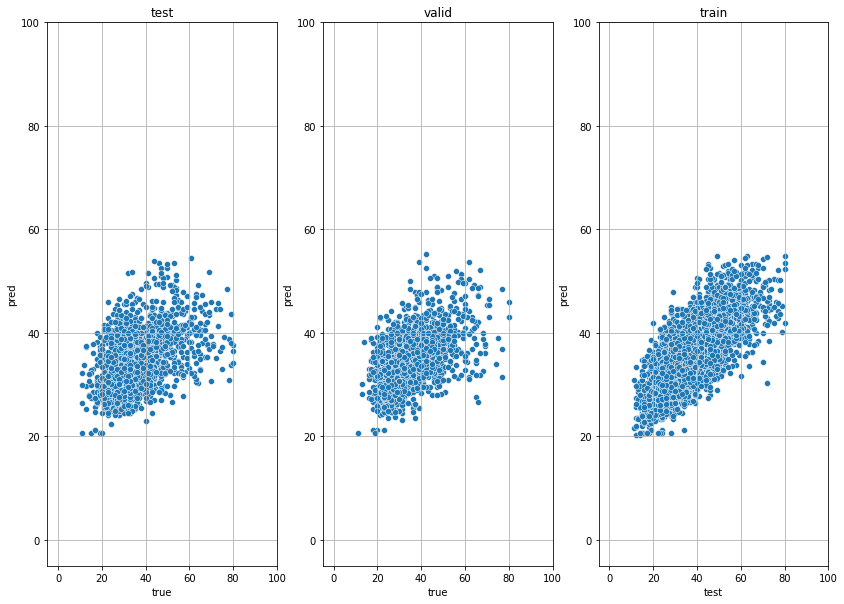

In [41]:
fig = plt.figure(figsize=(14, 10))

fig.add_subplot(1, 3,2)
plt.title("valid")
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlim(-5, 100)
plt.ylim(-5, 100)
plt.xlabel("true")
plt.ylabel("pred")
plt.grid()

fig.add_subplot(1, 3,1)
plt.title("test")
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlim(-5, 100)
plt.ylim(-5, 100)
plt.xlabel("true")
plt.ylabel("pred")
plt.grid()

fig.add_subplot(1, 3,3)
plt.title("train")
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlim(-5, 100)
plt.ylim(-5, 100)
plt.xlabel("test")
plt.ylabel("pred")
plt.grid()

In [46]:
Test=pd.DataFrame([y_test_pred, y_test, y_test_pred-y_test]).T
Test.columns=["pred","true","difference"]
Test.describe()

,pred,true,difference
count,2052.000000,2052.000000,2052.000000
mean,34.707814,35.029727,-0.321913
std,5.162291,11.302783,10.081980
min,20.640166,11.000000,-47.068479
25%,31.157320,27.000000,-5.314686
50%,34.388923,33.000000,1.051676
75%,37.769078,41.000000,6.385520
max,54.491561,80.000000,24.500607


In [59]:
#相関係数（0.5くらいはほしい）
res1 = pd.Series(y_train_pred).corr(pd.Series(y_train))
res2 = pd.Series(y_val_pred).corr(pd.Series(y_val))
res3 = pd.Series(y_test_pred).corr(pd.Series(y_test))

print(f"相関係数train:{res1:.3f},val:{res2:.3f},test:{res3:.3f}")

相関係数train:-0.002,val:-0.035,test:0.119


In [63]:
#予測結果のデータフレーム作成
test["predict"] = y_test_pred
test=test.reindex(columns=['No','predict'])
val["predict"] = y_val_pred
val=val.reindex(columns=['No','predict'])

test_val = pd.concat([test,val],axis=0)

In [64]:
df2 = pd.merge(df,test_val, on='No', how='left')

In [65]:
df2=df2.reindex(columns=['No','exam_time','predict',"age","sex","section","position","purpose","diagnosis","method"])

In [66]:
df2=df2.dropna()

In [67]:
df2.head(100)

,No,exam_time,predict,age,sex,section,position,purpose,diagnosis,method
1,2,28.0,28.375750,82,1,内泌,brain,繰り返すふらつきを主訴に来院｡小脳梗塞除外目的です｡,['小脳梗塞'],0
12,13,35.0,32.462724,69,0,脳外,brain,経過観察routine+mra+asl3相お願いしますｺｲﾙ後,"['脳底動脈瘤破裂', 'くも膜下出血', 'くも膜下出血']",0
14,15,27.0,35.368289,68,0,整形,lower_limb,左大腿部巨大脂肪肉腫;高分化型脂肪肉腫でした｡follow目的で再発の有無のﾁｪｯｸです｡股...,['左大腿部脂肪肉腫'],0
16,17,28.0,27.920387,70,1,脳外,brain,t1t2flairdwit2*とmra(頭高画質3ｽﾗﾌﾞ1mmvrあり),['左内頚動脈瘤'],0
17,18,38.0,35.551169,72,0,脳外,brain,t1t2flairdwit2*とmra(頭首)ﾌﾟﾗｰｸｲﾒｰｼﾞお願いします,['内頚動脈狭窄症'],0
...,...,...,...,...,...,...,...,...,...,...
275,281,52.0,26.567547,66,1,脳外,brain,経過観察,['めまい'],0
277,283,31.0,31.046382,76,0,脳内,spine,自己免疫性脳症の疑いで精査加療中｡四肢の動き悪く､頸椎症および頚髄炎などの除外目的です｡,"['頚椎症性', '脊髄症']",0
290,296,38.0,38.671686,79,0,脳外,brain,多発性脳腫瘍術後routinnece&fiestavolumeお願いします｡,['脳腫瘍'],1
293,299,35.0,28.370920,47,0,循内,brain,脳虚血発作で済生会に短期入院｡器質疾患の精査,"['一過性脳虚血', '発作']",0


In [ ]:
#モデルの保存
file_path = 'lightBGM_model

In [77]:
l = [3, 3, 2, 1, 5, 1, 4, 2, 3]

print(set(l))
# {1, 2, 3, 4, 5}

print(list(set(l)))
# [1, 2, 3, 4, 5]

{1, 2, 3, 4, 5}
[1, 2, 3, 4, 5]


In [ ]:
#Deep

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pytorch_lightning as pl
import torchmetrics

In [22]:
#出力の形式
#回帰：float32
#二値分類：float32
#多値分類：int64

In [23]:
x = torch.tensor(x, dtype=torch.float32)

In [24]:
y=np.array(y)

In [25]:
y = torch.tensor(y, dtype=torch.float32)

In [26]:
dataset = torch.utils.data.TensorDataset(x, y)

In [27]:
len(dataset)

10259

In [28]:
n_train = int(len(dataset) * 0.6)
n_val = int(len(dataset) * 0.2)
n_test = len(dataset) - n_train - n_val

torch.manual_seed(0)

train, val, test = torch.utils.data.random_split(dataset, [n_train, n_val, n_test])

In [29]:
len(train), len(val), len(test)

(6155, 2051, 2053)

In [30]:
batch_size = 10
train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

In [31]:
x, t = next(iter(train_loader))
print(x.shape,t.shape)

torch.Size([10, 260]) torch.Size([10])


In [32]:
fc1 = nn.Linear(260, 100)
dr1 = nn.Dropout(p=0.2)
fc2 = nn.Linear(100, 10)
dr2 = nn.Dropout(p=0.2)
fc3 = nn.Linear(10, 1)

In [33]:
h = fc1(x)
h = dr1(h)
h = fc2(h)
h=  dr2(h)
h=  fc3(h)

In [34]:
h.shape

torch.Size([10, 1])

In [35]:
h = h.squeeze(1)

In [36]:
h.shape

torch.Size([10])

In [37]:
h.shape

torch.Size([10])

In [38]:
t.shape

torch.Size([10])

In [39]:
y = t.unsqueeze(1)
y.shape

torch.Size([10, 1])

In [40]:
class Net(pl.LightningModule):
    



    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(260, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.dr1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(100, 10)
        self.bn2 = nn.BatchNorm1d(10)
        self.dr2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(10, 1)


    def forward(self, h):
        h = self.fc1(h)
        h = self.bn1(h)
        h = self.dr1(h)
        h = self.fc2(h)
        h = self.bn2(h)
        h = self.dr2(h)
        h = self.fc3(h)
        
        h = h.squeeze(1)        

        return h


    def training_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        
        
        loss = F.mse_loss(y, t)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        return loss
    
    # 検証データに対する処理
    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        
        
        loss = F.mse_loss(y, t)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        return loss


    # テストデータに対する処理
    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        
        
        loss = F.mse_loss(y, t)
        self.log('test_loss', loss, on_step=False, on_epoch=True)
        return loss




    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        return optimizer

In [41]:
# 乱数のシードを固定して再現性を確保
pl.seed_everything(0)

# インスタンス化
net = Net()
net

Global seed set to 0


Net(
  (fc1): Linear(in_features=260, out_features=100, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dr1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dr2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
trainer = pl.Trainer(max_epochs=5)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [43]:
trainer.fit(net, train_loader, val_loader)


  | Name | Type        | Params
-------------------------------------
0 | fc1  | Linear      | 26.1 K
1 | bn1  | BatchNorm1d | 200   
2 | dr1  | Dropout     | 0     
3 | fc2  | Linear      | 1.0 K 
4 | bn2  | BatchNorm1d | 20    
5 | dr2  | Dropout     | 0     
6 | fc3  | Linear      | 11    
-------------------------------------
27.3 K    Trainable params
0         Non-trainable params
27.3 K    Total params
0.109     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
Global seed set to 0
/usr/local/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [44]:
#logはここに格納される
trainer.callback_metrics

{'train_loss': tensor(104.1228),
 'train_loss_step': tensor(40.5246),
 'val_loss': tensor(102.5343),
 'train_loss_epoch': tensor(104.1228)}

In [45]:
#モデルをテストデータで検証
results = trainer.test(dataloaders=test_loader)

/usr/local/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1398: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `test(ckpt_path='best')` to use and best model checkpoint and avoid this warning or `ckpt_path=trainer.checkpoint_callback.last_model_path` to use the last model.
  rank_zero_warn(
Restoring states from the checkpoint path at /workspace/MRI/2022_MRI_Sc/MRI_SC/lightning_logs/version_23/checkpoints/epoch=4-step=3074.ckpt
Loaded model weights from checkpoint at /workspace/MRI/2022_MRI_Sc/MRI_SC/lightning_logs/version_23/checkpoints/epoch=4-step=3074.ckpt
/usr/local/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to

Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 97.15078735351562}
--------------------------------------------------------------------------------


In [46]:
results

[{'test_loss': 97.15078735351562}]

In [47]:
trainer.callback_metrics

{'test_loss': tensor(97.1508)}

In [56]:
x, t = next(iter(train_loader))

In [57]:
t

tensor([30., 39., 28., 34., 38., 21., 20., 15., 30., 23.])

In [58]:
net.forward(x)

tensor([33.4845, 29.5208, 38.7879, 34.5993, 39.7088, 34.5998, 32.9879, 29.3948,
        33.7524, 39.0667], grad_fn=<SqueezeBackward1>)

In [391]:
import optuna

In [235]:
#xgBoost

In [236]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
xgb_model = xgb.XGBRegressor()
reg_xgb = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
reg_xgb.fit(x_train, y_train)

In [ ]:
y_test_pred =reg_xgb.predict(x_test)

In [ ]:
y_train_pred = reg_xgb.predict(x_train)

In [ ]:
y_val_pred = reg_xgb.predict(x_val)

In [ ]:
fig = plt.figure(figsize=(14, 10))

fig.add_subplot(1, 3,2)
plt.title("valid")
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlim(-5, 80)
plt.ylim(-5, 80)
plt.xlabel("true")
plt.ylabel("pred")
plt.grid()

fig.add_subplot(1, 3,1)
plt.title("test")
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlim(-5, 80)
plt.ylim(-5, 80)
plt.xlabel("true")
plt.ylabel("pred")
plt.grid()

fig.add_subplot(1, 3,3)
plt.title("train")
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlim(-5, 80)
plt.ylim(-5, 80)
plt.xlabel("true")
plt.ylabel("pred")
plt.grid()